In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import differential_evolution

In [5]:
def rastrigin(x):
    return 10 + np.sum(x**2 - 10*np.cos(2*np.pi*x), axis=0)

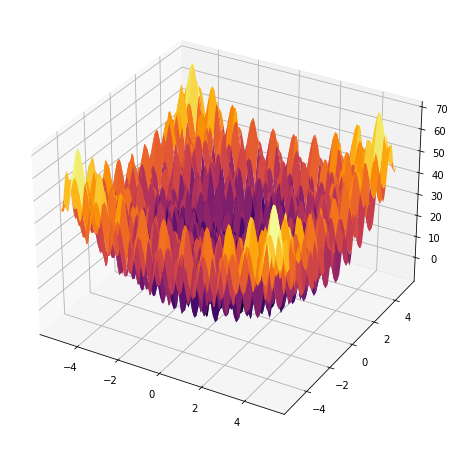

In [6]:
fig = plt.figure(figsize =[12, 8])
ax = fig.gca(projection = '3d')

X = np.arange(-5.12, 5.12, 0.1)
Y = np.arange(-5.12, 5.12, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rastrigin(np.array([X, Y]))
surf = ax.plot_surface(X, Y, Z, cmap = 'inferno')
plt.show()

In [13]:
bounds = [(-5.12, 5.12)]
res = differential_evolution(rastrigin, bounds, seed=21, 
        strategy='best1bin',  popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate')
res

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 497
     nit: 32
 success: True
       x: array([-5.38788072e-10])

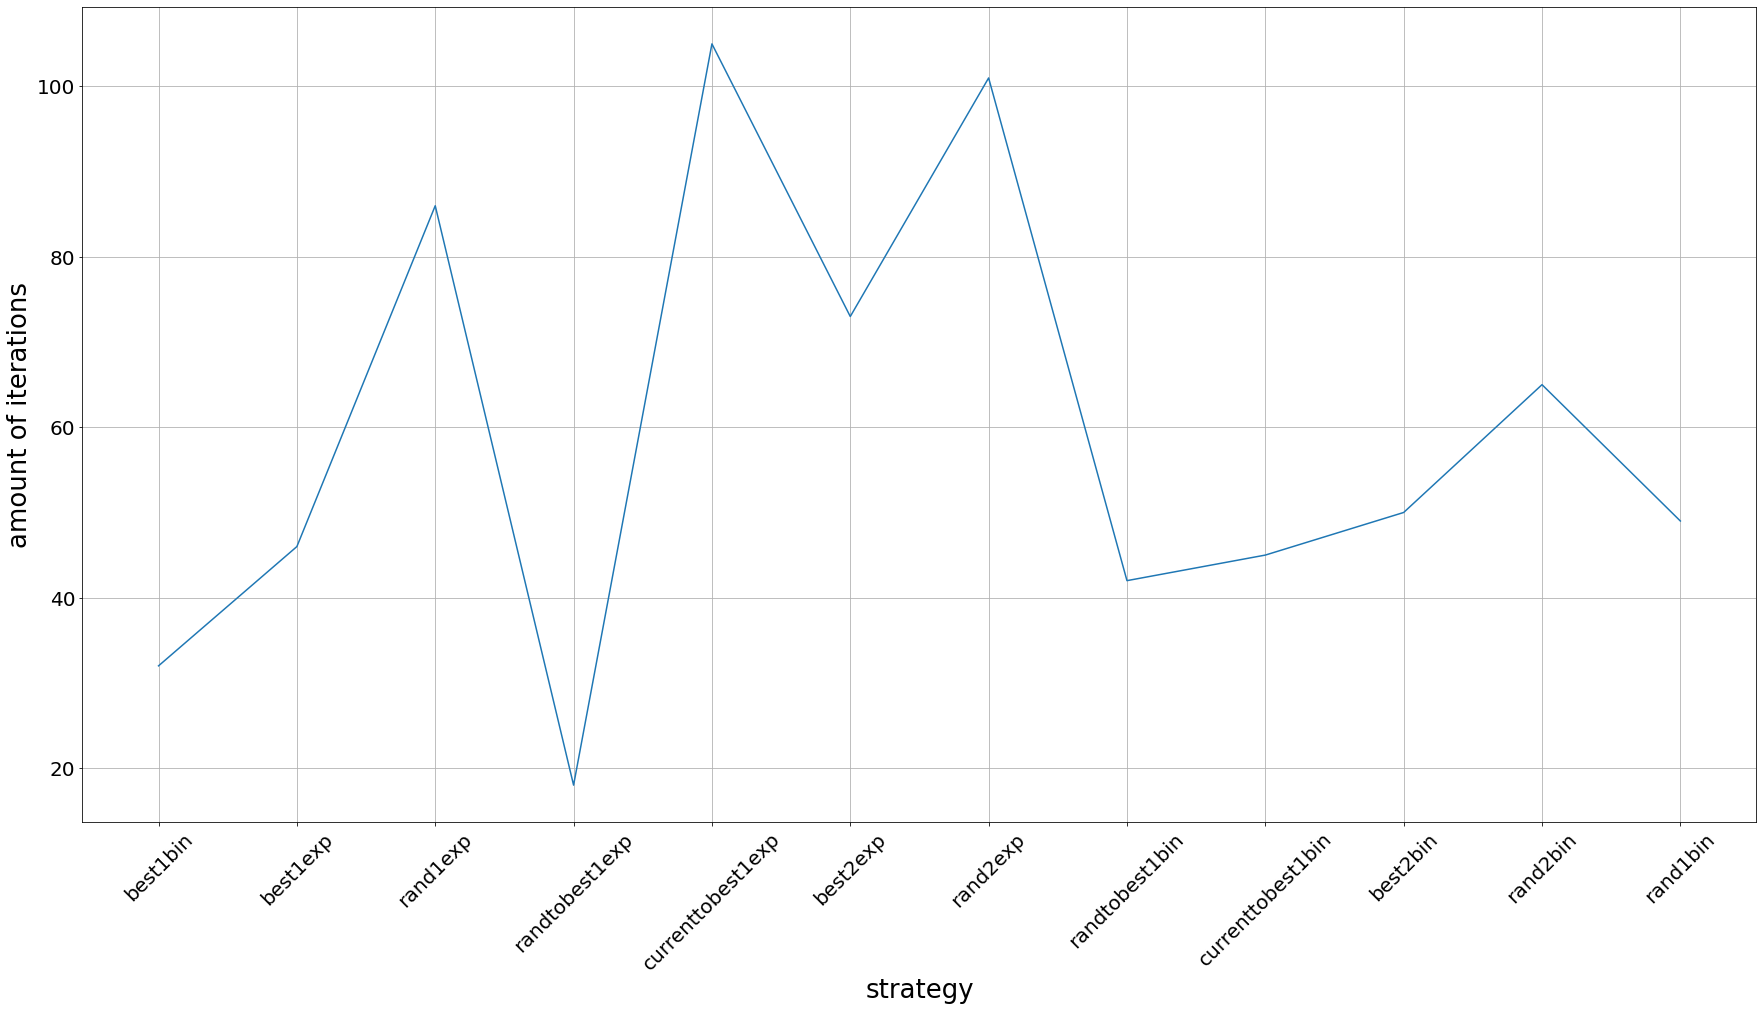

In [95]:
itlist = []
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 
              'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin','rand1bin']

for strategy_ in strategies:
    res = differential_evolution(rastrigin, bounds, seed=21, 
        strategy=strategy_,  popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate', disp=False)
    itlist.append(res.nit)

fig = plt.figure()

plt.grid()
fig.set_figheight(15)
fig.set_figwidth(30)

plt.rcParams['font.size'] = '20'
plt.xticks(rotation=45)
plt.xlabel('strategy', fontsize=26)
plt.ylabel('amount of iterations', fontsize=26)

plt.plot(strategies, itlist)

лучше всех себя показала стратегия randtobest1exp

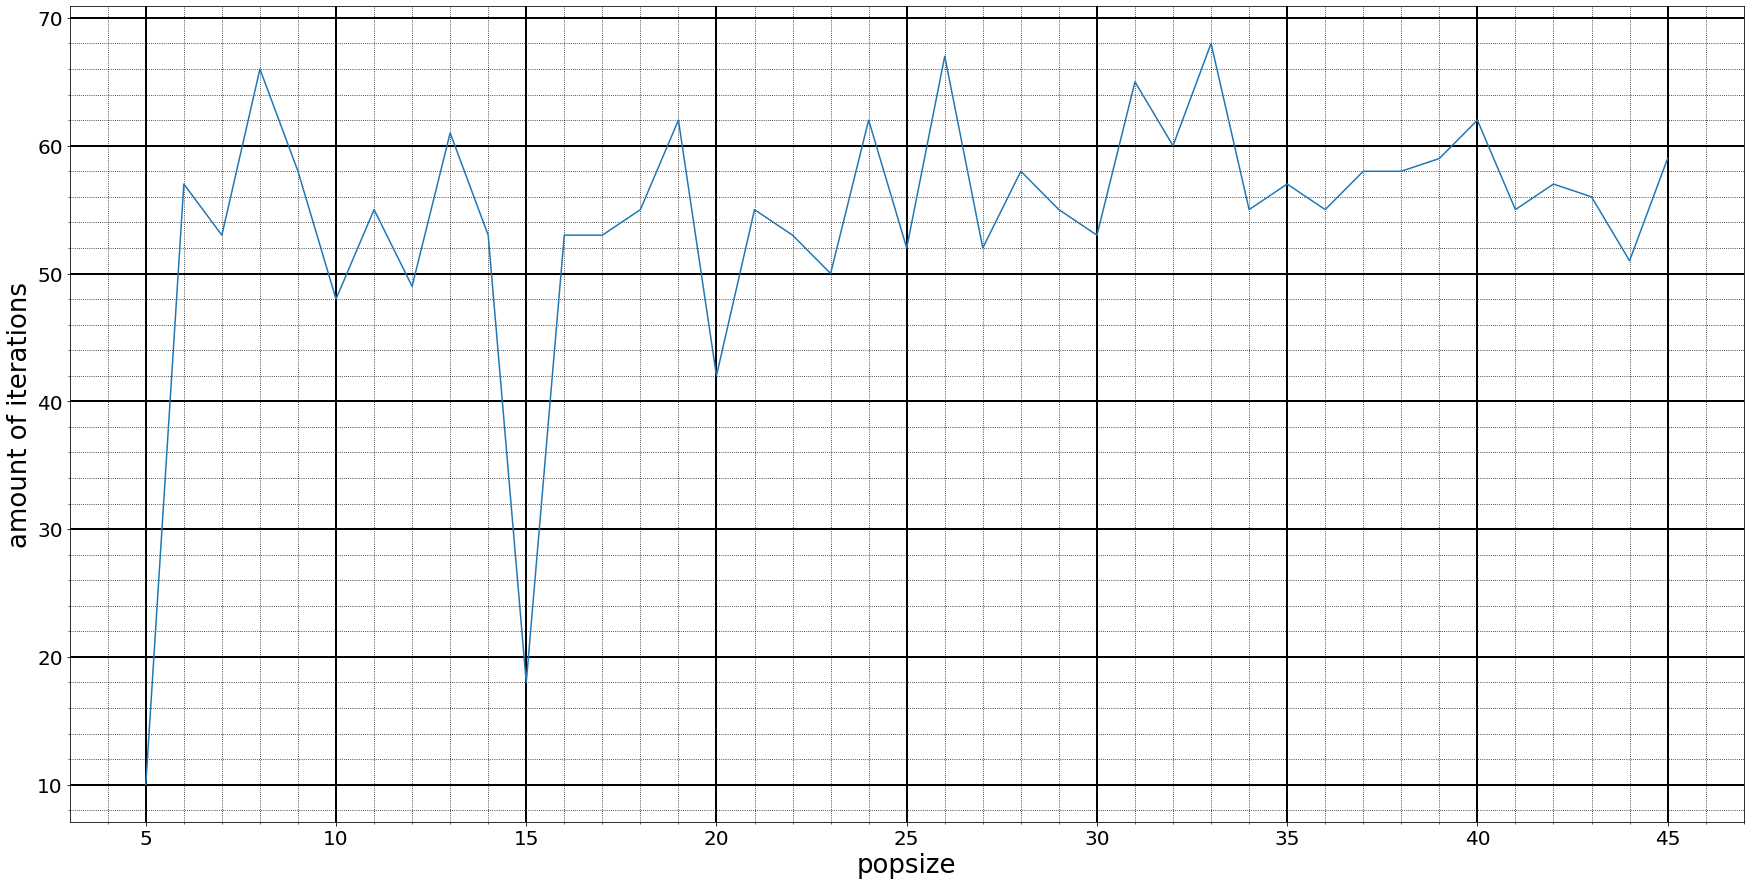

In [94]:
itlist = []

for i in range(5, 46):
    res = differential_evolution(rastrigin, bounds, seed=21, 
        strategy='randtobest1exp',  popsize=i, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate', disp=False)
    itlist.append(res.nit)

fig, ax = plt.subplots()

ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.set_figheight(15)
fig.set_figwidth(30)

plt.rcParams['font.size'] = '20'
plt.xlabel('popsize', fontsize=26)
plt.ylabel('amount of iterations', fontsize=26)

plt.plot(range(5, 46), itlist)

оптимальное значение popsize=15

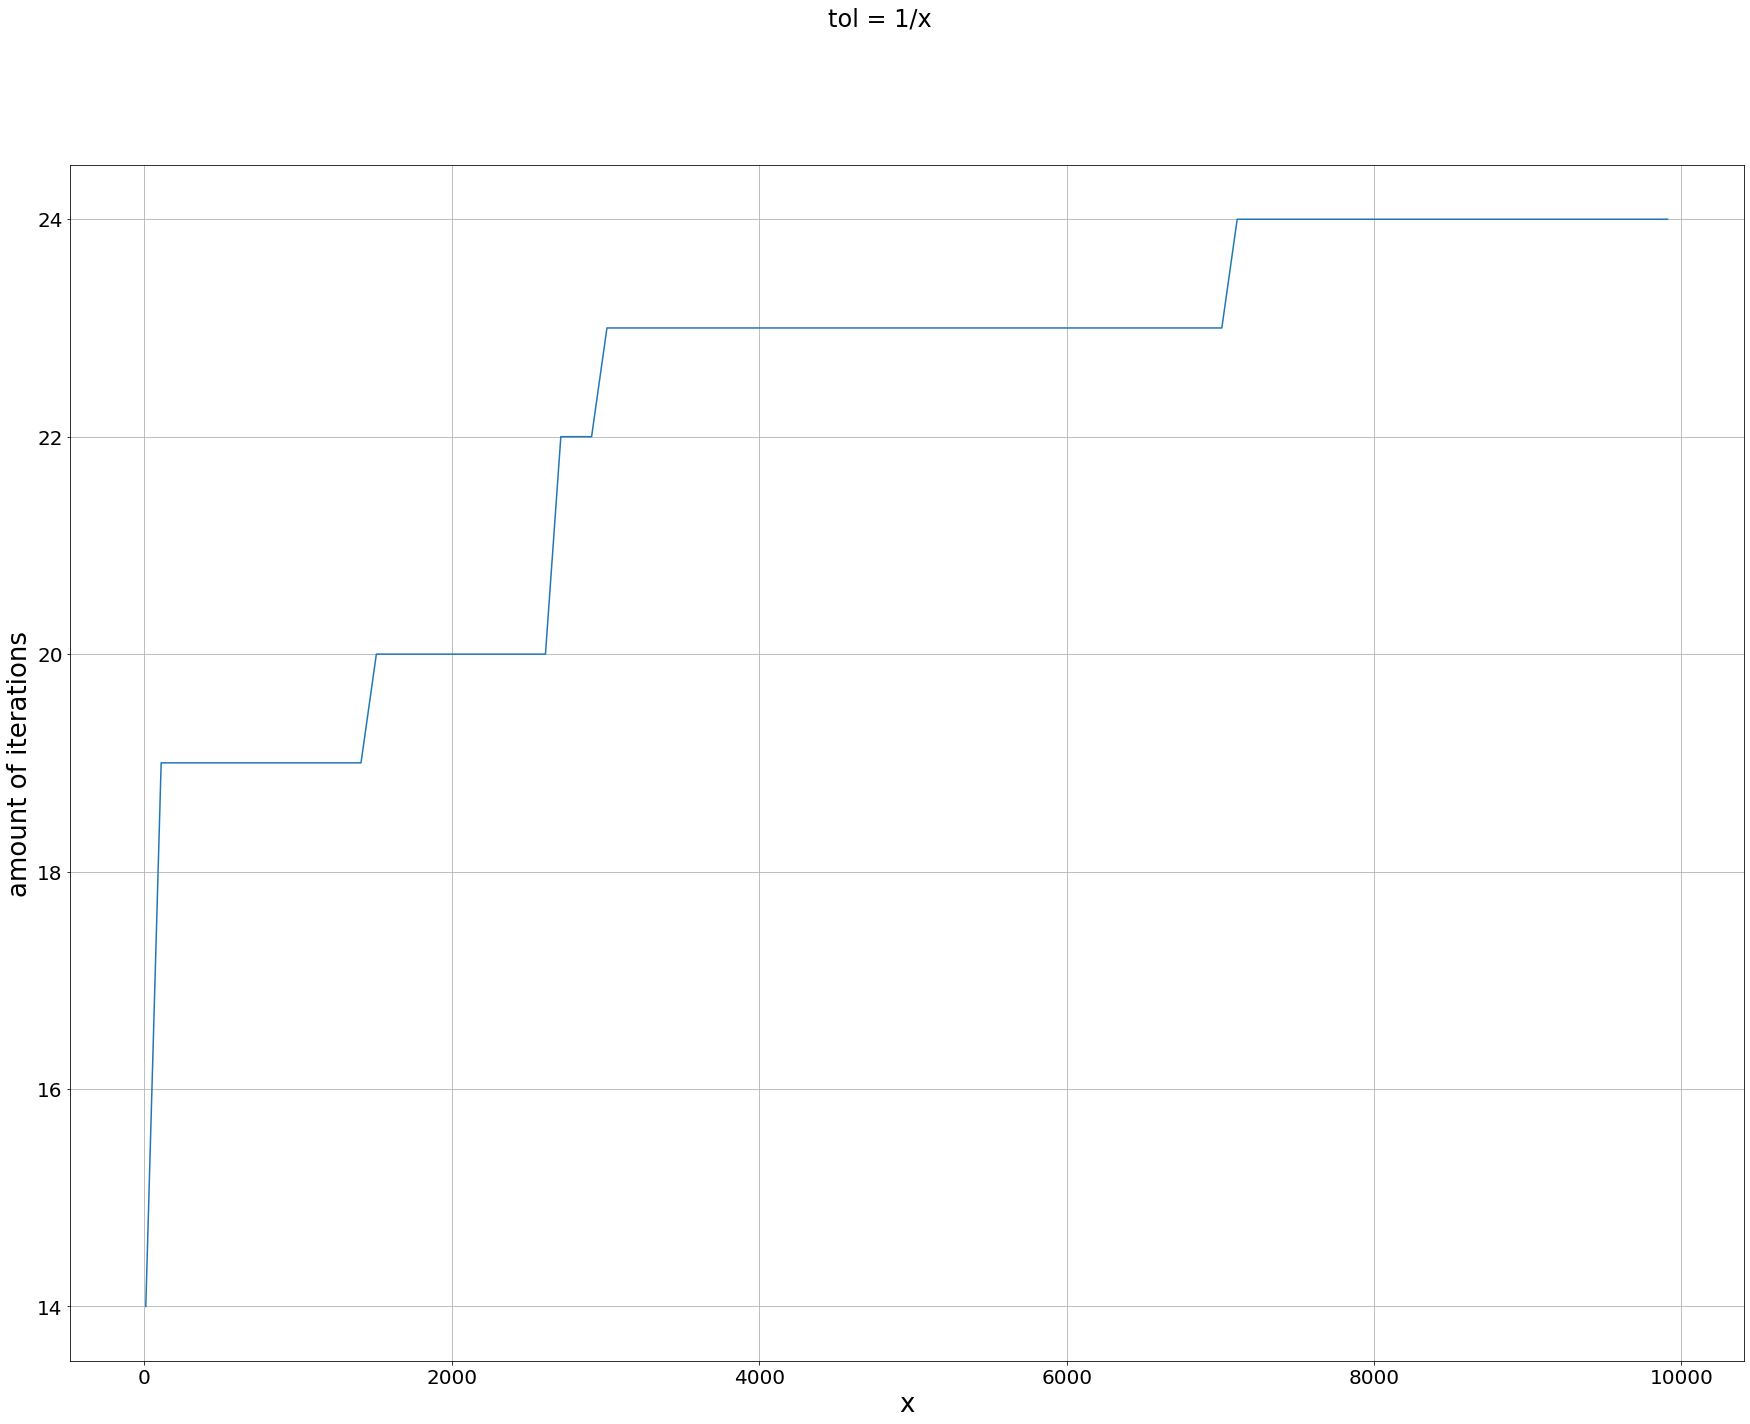

In [91]:
itlist = []

for i in range(10, 10000, 100):
    res = differential_evolution(rastrigin, bounds, seed=21, 
        strategy='randtobest1exp',  popsize=15, tol=1/i, mutation=(0.5, 1), recombination=0.7, updating='immediate', disp=False)
    itlist.append(res.nit)

fig = plt.figure()

fig.set_figheight(22)
fig.set_figwidth(30)
plt.grid()

plt.rcParams['font.size'] = '20'
plt.xlabel('x', fontsize=26)
plt.ylabel('amount of iterations', fontsize=26)
fig.suptitle('tol = 1/x')
plt.plot(range(10, 10000, 100), itlist)

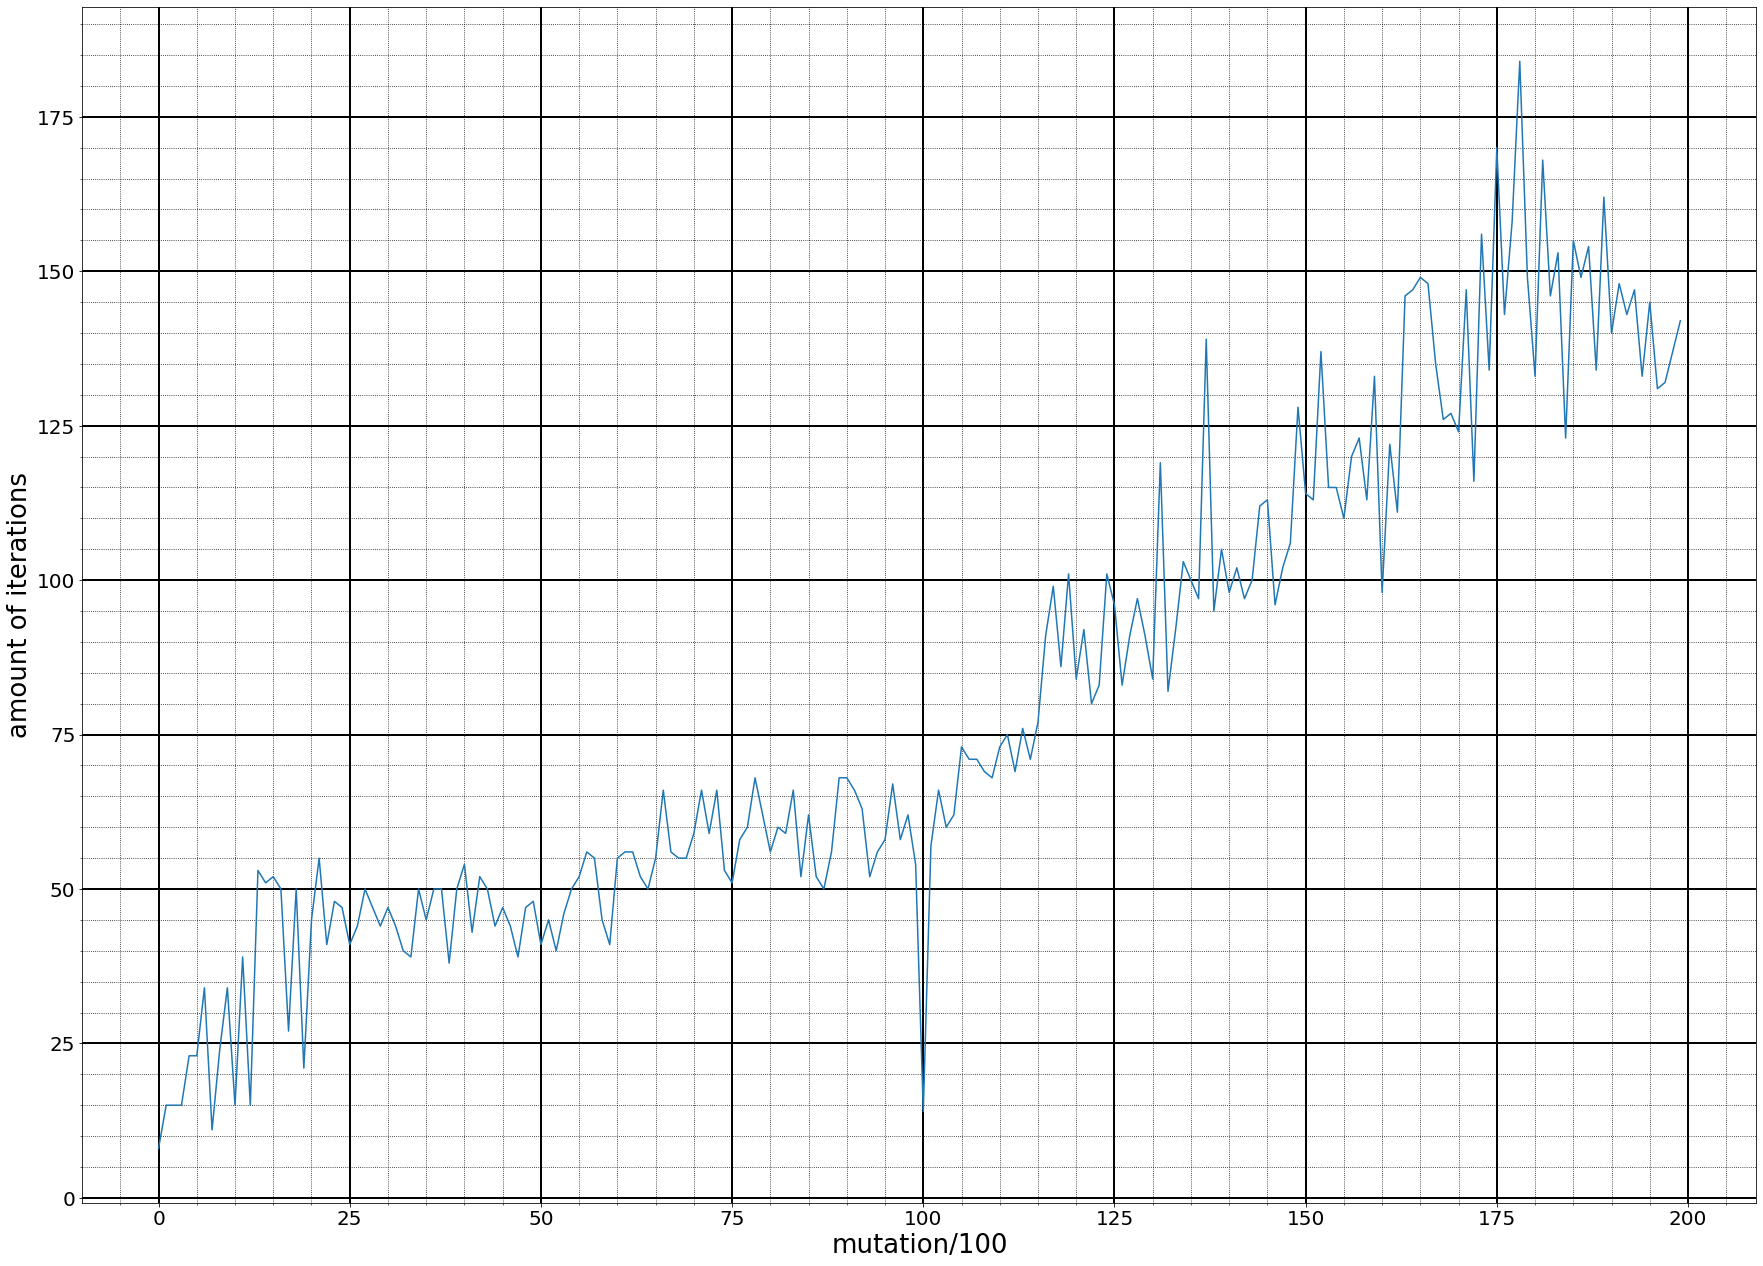

In [89]:
itlist = []

for i in range(200):
    res = differential_evolution(rastrigin, bounds, seed=21, 
        strategy='randtobest1exp',  popsize=15, tol=0.01, mutation=i/100, recombination=0.7, updating='immediate', disp=False)
    itlist.append(res.nit)

fig, ax = plt.subplots()

ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.set_figheight(22)
fig.set_figwidth(30)

plt.rcParams['font.size'] = '20'
plt.xlabel('mutation/100', fontsize=26)
plt.ylabel('amount of iterations', fontsize=26)
plt.plot(range(200), itlist)

хорошее значений для параметра mutation=1

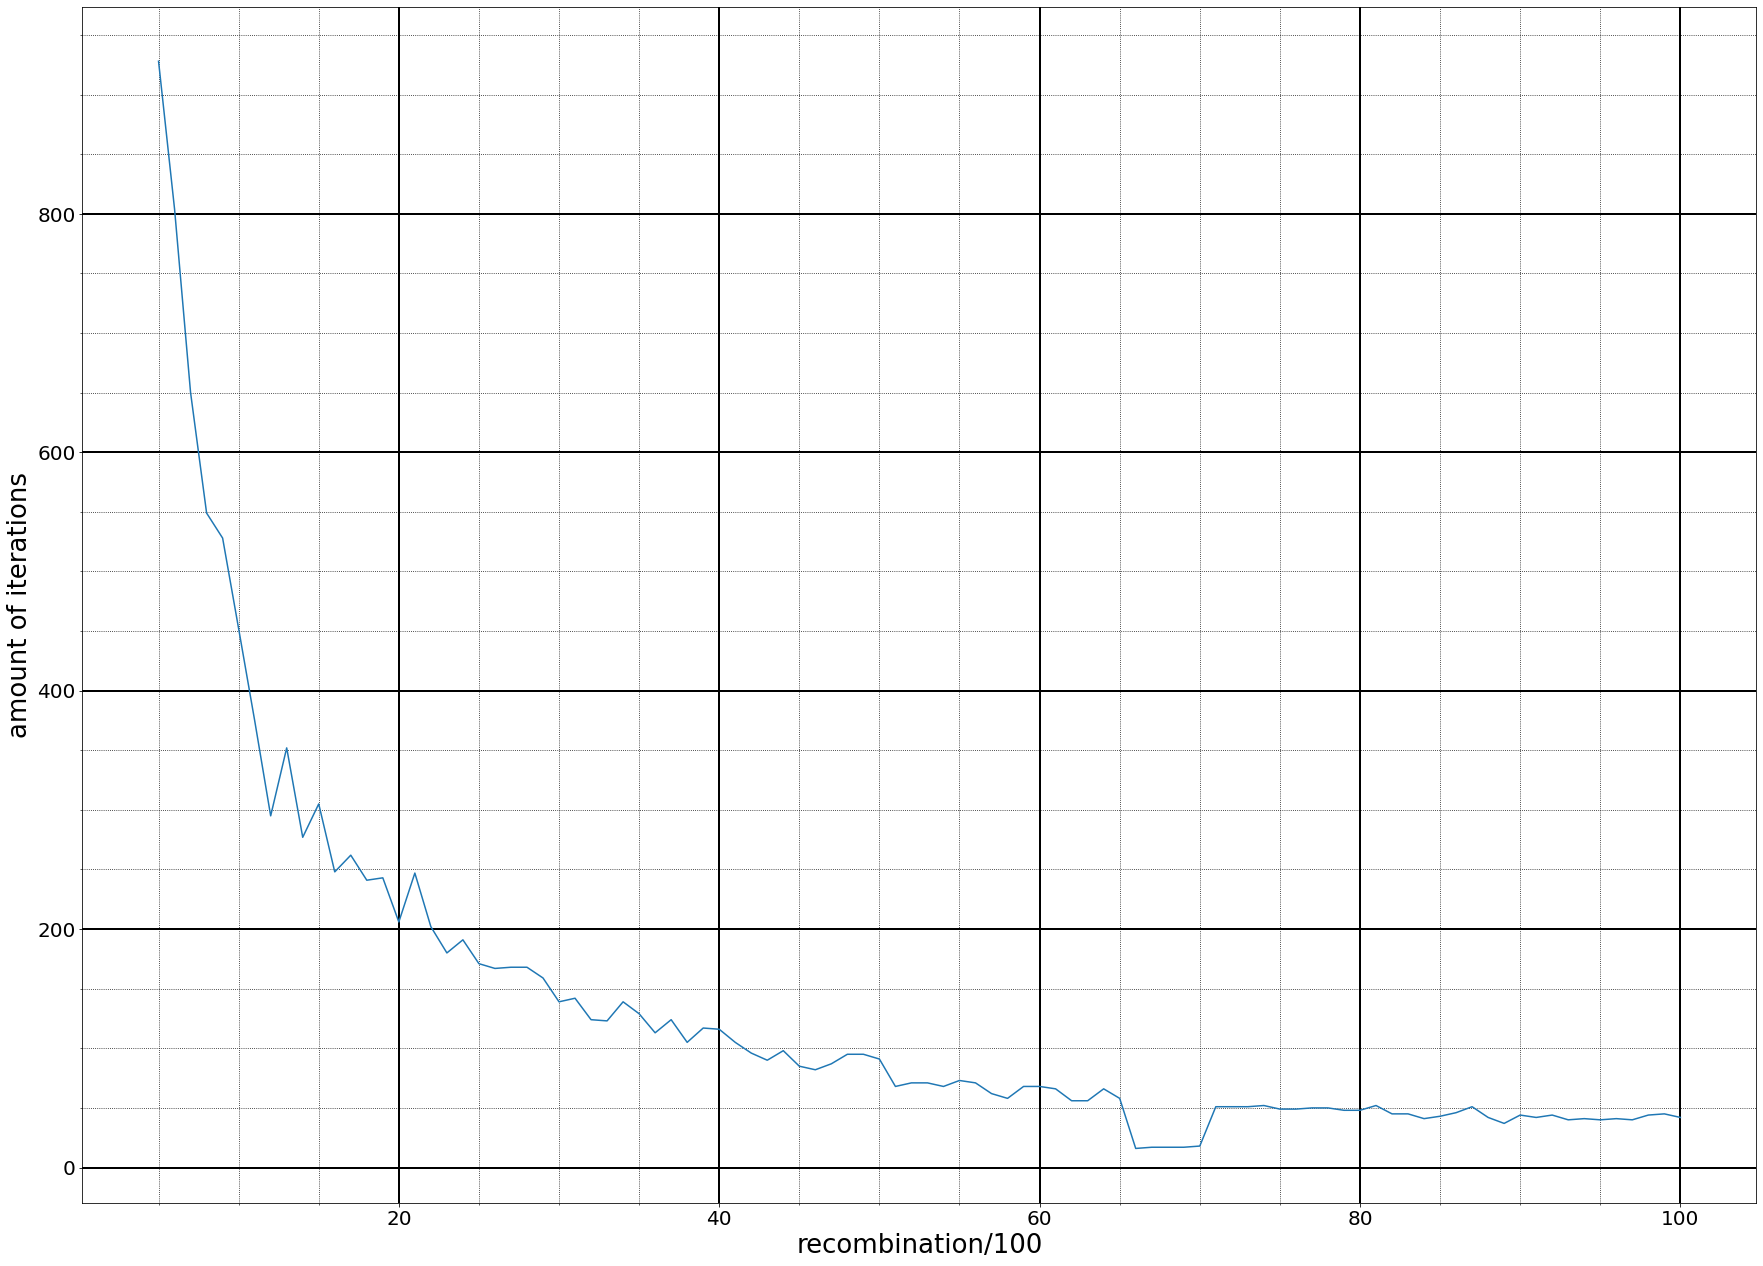

In [87]:
itlist = []

for i in range(5, 101):
    res = differential_evolution(rastrigin, bounds, seed=21, 
    strategy='randtobest1exp', popsize=15, tol=0.01, mutation=(0.5, 1), recombination=i/100, updating='immediate', disp=False)
    itlist.append(res.nit)

fig, ax = plt.subplots()

ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.set_figheight(22)
fig.set_figwidth(30)

plt.rcParams['font.size'] = '20'
plt.xlabel('recombination/100', fontsize=26)
plt.ylabel('amount of iterations', fontsize=26)
plt.plot(range(5, 101), itlist)

In [ ]:
оптимальное значение recombination=0.68

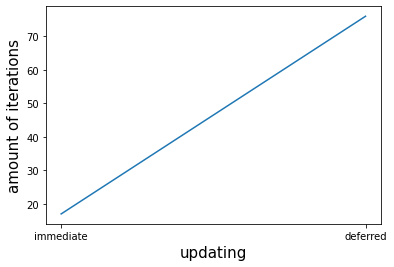

In [101]:
itlist = []

updatings = ['immediate', 'deferred']

for updating_ in updatings:
    res = differential_evolution(rastrigin, bounds, seed=21, 
        strategy='randtobest1exp', popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.68, updating=updating_, disp=False)
    itlist.append(res.nit)

fig = plt.plot()

plt.rcParams['font.size'] = '10'
plt.xlabel('updating', fontsize=15)
plt.ylabel('amount of iterations', fontsize=15)
plt.plot(updatings, itlist)

меньше итераций требуется при постоянном обновлении в пределах одного поколения